# 1. Linear Regression
### 공부 시간에 따른 시험 점수


In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset = pd.read_csv('LinearRegressionData.csv')

In [5]:
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [14]:
X = dataset.iloc[:,:-1].values # 처음부터 마지막 컬럼 직전까지
Y = dataset.iloc[:,-1].values #마지막 컬럼

In [15]:
X , Y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]))

In [16]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() #객체 생성
reg.fit(X,Y) #학습 (모델 생성)

LinearRegression()

In [17]:
y_pred = reg.predict(X) #X에 대한 예측
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

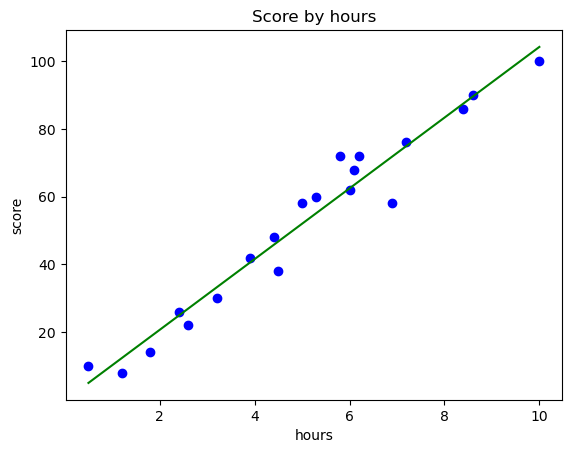

In [20]:
plt.scatter(X,Y,color='blue')#산점도
plt.plot(X,y_pred,color = 'green') # 선 그래프
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [23]:
print('9시간 공부했을 때 예상 점수 : ',reg.predict([[9],[8],[7]]))

9시간 공부했을 때 예상 점수 :  [93.77478776 83.33109082 72.88739388]


In [24]:
reg.coef_#기울기

array([10.44369694])

In [25]:
reg.intercept_# y절편 (b)

-0.218484702867201

y= mx + b -> y= 10.4436x - 0.2184 

### 데이터 세트 분리


In [26]:
import matplotlib.pyplot as plt
import pandas as pd

In [28]:
dataset = pd.read_csv('LinearRegressionData.csv')
dataset

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22
5,3.2,30
6,3.9,42
7,4.4,48
8,4.5,38
9,5.0,58


In [29]:
X= dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 0)#훈련 80 : 테스트:20


In [32]:
X,len(X) #전체 데이터 x, 개수

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

In [33]:
X_train,len(X_train) #훈련 세트 x, 개수

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [34]:
X_test, len(X_test)

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

In [35]:
y, len(y)

(array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]),
 20)

In [36]:
y_train, len(y_train)

(array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62]), 16)

In [37]:
y_test, len(y_test)

(array([ 90,   8, 100,  38]), 4)

### 분리된 데이터를 통한 모델링

In [38]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [41]:
reg.fit(X_train,y_train) #훈련세트로 하기

LinearRegression()

### 데이터 시각화(훈련 세트)

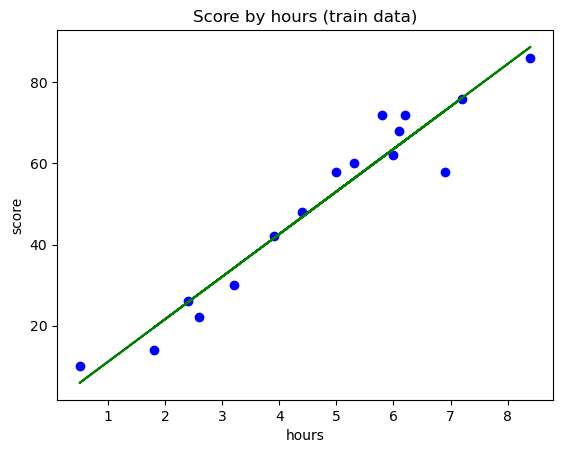

In [44]:
plt.scatter(X_train,y_train,color='blue')#산점도
plt.plot(X_train,reg.predict(X_train),color = 'green') # 선 그래프
plt.title('Score by hours (train data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 데이터 시각화 (테스트 세트)

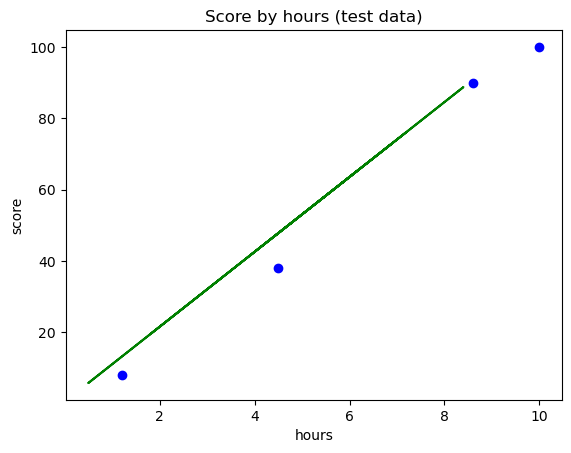

In [45]:
plt.scatter(X_test,y_test,color='blue')#산점도
plt.plot(X_train,reg.predict(X_train),color = 'green') # 선 그래프
plt.title('Score by hours (test data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [46]:
reg.coef_

array([10.49161294])

In [49]:
reg.intercept_

0.6115562905169796

### 모델 평가

In [50]:
reg.score(X_test,y_test) #테스트 세트를 통한 모델 평가

0.9727616474310156

In [51]:
reg.score(X_train,y_train)

0.9356663661221668

### 경사 하강법(Gradient Descent)

max_iter : 훈련 세트 반복 횟수(Epoch 횟수)

eta0 : 학습률(learning rate)

In [72]:
from sklearn.linear_model import SGDRegressor # Stochastic Gradient Descent 확률적 경사 하강법
sr = SGDRegressor(max_iter=1000,eta0=0.001,random_state=0,verbose=1)
sr.fit(X_train,y_train)

-- Epoch 1
Norm: 2.40, NNZs: 1, Bias: 0.442470, T: 16, Avg. loss: 1181.034371
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 3.84, NNZs: 1, Bias: 0.697455, T: 32, Avg. loss: 754.011321
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 4.89, NNZs: 1, Bias: 0.881472, T: 48, Avg. loss: 520.842928
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 5.70, NNZs: 1, Bias: 1.023556, T: 64, Avg. loss: 374.527388
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 6.34, NNZs: 1, Bias: 1.137258, T: 80, Avg. loss: 277.717040
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 6.88, NNZs: 1, Bias: 1.230635, T: 96, Avg. loss: 210.603548
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 7.32, NNZs: 1, Bias: 1.308149, T: 112, Avg. loss: 162.433366
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 7.69, NNZs: 1, Bias: 1.372847, T: 128, Avg. loss: 127.468199
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 8.01, NNZs: 1, Bias: 1.427757, T: 144, Avg. loss: 101.814505
Total training time: 0.

SGDRegressor(eta0=0.001, random_state=0, verbose=1)

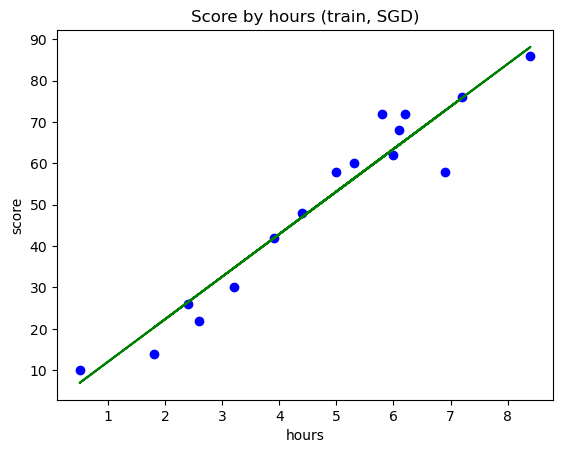

In [73]:
plt.scatter(X_train,y_train,color='blue')#산점도
plt.plot(X_train,sr.predict(X_train),color = 'green') # 선 그래프
plt.title('Score by hours (train, SGD)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [54]:
sr.coef_, sr.intercept_

(array([10.42605221]), array([1.37654362]))

In [55]:
sr.score(X_train,y_train)

0.9352339051554663

In [56]:
sr.score(X_test,y_test)

0.9694779232690977